<a href="https://colab.research.google.com/github/hkkor/hkkor.github.io/blob/master/%EC%95%84%EB%8F%99%20%EC%B2%AD%EC%86%8C%EB%85%84%20%EC%82%B6%EC%9D%98%20%EB%A7%8C%EC%A1%B1%EB%8F%84%20%EC%98%88%EC%B8%A1%20%EB%AA%A8%ED%98%95%20%EC%97%B0%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/gdrive')

import pandas as pd
mynpl = pd.read_csv('/gdrive/My Drive/Colab Notebooks/mynpl.csv')  

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
feature_cols = ['YFAM2C02w1', 'YEDU1A00w1', 'YPSY2A03w1', 'YPSY3A04w1',
       'YPSY3A10w1', 'YPSY2A02w1', 'YPSY2A01w1', 'YPSY3A01w1', 'YINT2B11w1',
       'YPSY4B06w1', 'YPSY4E06w1']
X = mynpl.loc[:, feature_cols]
Y = mynpl.satisfaction

In [ ]:
import sys
print("Python 버전:", sys.version)

import pandas as pd
print("pandas 버전:", pd.__version__)

import matplotlib
print("matplotlib 버전:", matplotlib.__version__)

import numpy as np
print("NumPy 버전:", np.__version__)

import scipy as sp
print("SciPy 버전:", sp.__version__)

import IPython
print("IPython 버전:", IPython.__version__)

import sklearn
print("Sklearn 버전:", sklearn.__version__)


Python 버전: 3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]
pandas 버전: 1.1.2
matplotlib 버전: 3.2.2
NumPy 버전: 1.18.5
SciPy 버전: 1.4.1
IPython 버전: 5.5.0
Sklearn 버전: 0.22.2.post1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

훈련 세트와 테스트 세트로 나누고 이웃의 수를 달리 하여 훈련 세트와 테스트 세트의 성능을 평가함

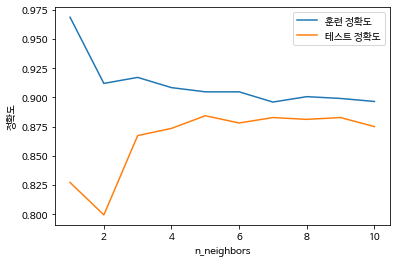

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, stratify=Y, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

## 로지스틱 회귀분석

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.889
테스트 세트 점수: 0.887


*   규제의 강도(C) 를 기본값 1.0 으로 지정하여 로지스틱 회귀분석한 결과 훈련 세트와 테스트 세트 양쪽에 88% 정확도의 성능을 냄.
*   두 세트 정확도가 비슷하므로 과소적합임을 추측함.

In [ ]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.889
테스트 세트 점수: 0.887




*   모델의 제약을 더 풀어줌(C=100)
*   C=1.0 대비 훈련 세트와 테스트 세트의 정확도 변화가 없음
* 복잡도가 높지 않은 모델임을 알 수 있음




In [ ]:
logreg001 = LogisticRegression(C=0.01, max_iter=9000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.876
테스트 세트 점수: 0.864


* 규제를 더 강하게 지정함(C=0.01)
* 이미 과소적합된 모델에서 더욱 복잡도를 낮추는 결과 정확도가 떨어짐

### 규제 매개변수 C 설정을 세 가지로 다르게 학습시킨 모델의 특성별 계수 크기 비교

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


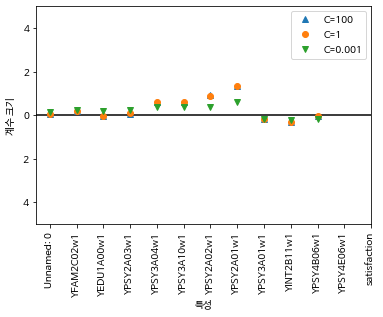

In [ ]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(mynpl.shape[1]), mynpl, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()


### L1 규제를 사용하여 각기 다른 C 값을 적용한 로지스틱 회귀 모델 계수

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.82
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.82
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.89
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.88
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.89
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.89


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


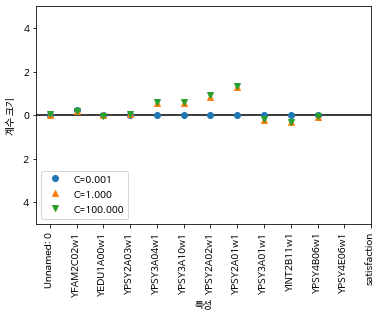

In [ ]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(mynpl.shape[1]), mynpl, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

* YPSY2A01w1, YPSY2A02w1, YPSY3A10w1, YPSY3a04w1 특성이 삶의 만족도와 가장 관련이 깊음을 알 수 있다

## 의사결정나무

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, stratify=Y, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.978
테스트 세트 정확도: 0.833


* 기본값 설정으로 완전한 (모든 리프 노드가 순수 노드가 될 때까지 생성한 트리) 모델 생성
* random_state 옵션을 고정해 만들어진 트리를 같은 조건으로 비교
* 테스트 세트의 정확도는 이전 선형 모델에서의 정확도인 89%보다 낮음


### 사전 가지치기를 적용하여 트리의 설장을 제한함(max_depth =4)

In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.893
테스트 세트 정확도: 0.873


* 트리 깊이를 제한하여 과대적합이 즐어듬
* 훈련 세트 정확도는 낮아졌지만 테스트 세트의 성능을 개선함

### 시각화를 통한 의사결정나무 분석

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["불만", "만족"],
                feature_names=feature_cols, impurity=False, filled=True)

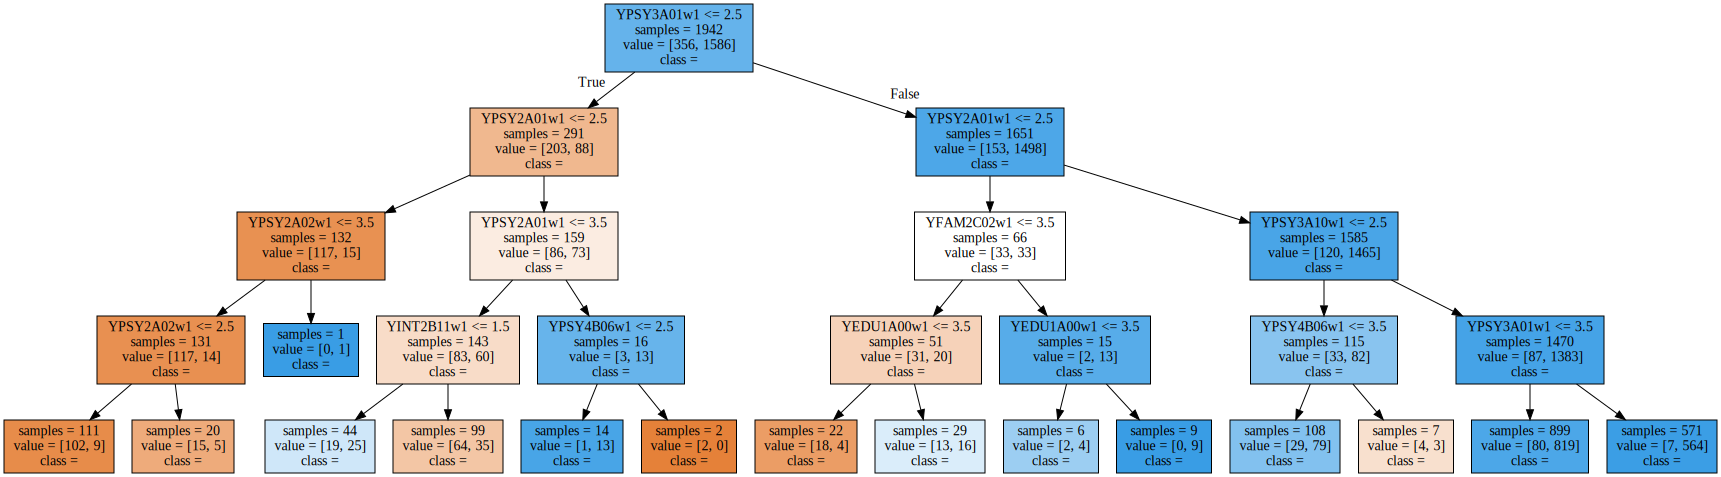

In [ ]:
import graphviz

with open("tree.dot",encoding='UTF-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

* 깊이 4인 트리에서 루트 노드의 오른쪽 가지를 따라가면 (YPSY3A02w1 > 2.5) 최종 571개 샘플에서 만족 564, 불만 7인 노드를 만나게 된다(불만이 7로 과대적합 줄어듬)

### 트리의 특성 중요도

In [ ]:
print("특성 중요도:\n", tree.feature_importances_)

특성 중요도:
 [0.02009582 0.01626052 0.         0.         0.04260766 0.00981908
 0.17122525 0.71292131 0.0108068  0.01626355 0.        ]


* 트리가 어떻게 작동하는지 요약하는 속성
* 트리를 만다는 결정에 각 특성이 얼마나 중요한지를 평가
* 1은 완벽하게 타깃 클래스를 예측했다는 의미


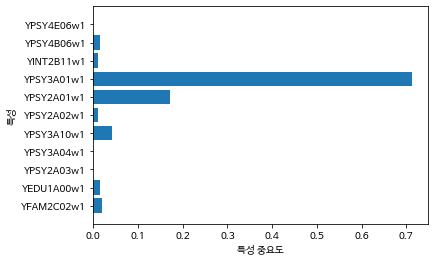

In [ ]:
def plot_feature_importances_mynpl(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_cols)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_mynpl(tree)

* 첫 번째 노드에서 사용한 'YPSY3A01w1'이 가장 중요한 특성으로 나타남

## 랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 0.982
테스트 세트 정확도: 0.872


* 깊이 4로 제한한 의사결정나무 결과와 비교했을 때 훈련 세트 정확도가 높아졌음에도(과대적합 우려에도 불구하고) 테스트 세트 정확도는 같은 수준을 유지함  

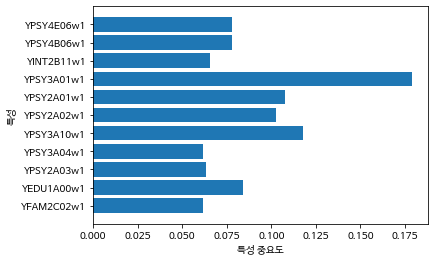

In [ ]:
plot_feature_importances_mynpl(forest)

* 랜덤포레스트의 특성 중요도는 의사결정나무에서 하나의 트리가 제공하는 것 보다 더 신뢰할 만함
* 의사결정나무 보다 훨씬 많은 특성이 0 이상의 중요도 값을 가짐
* 의사결정나무 결과 대비 YPSY2A01w1 보다 YPSY3A10w1를 더 중요한 특성으로 계산함.

## 그레이디언트 부스팅 회귀 트리

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.911
테스트 세트 정확도: 0.878


* 기본값인 깊이가 3인 트리 100개와 학습률 0.1을 사용함

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.883
테스트 세트 정확도: 0.884


* 과대적합을 막기 위해서 트리의 최대 깊이를 줄여(max_depth=1) 사전 가지치기를 강하게 함

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.875
테스트 세트 정확도: 0.880


* 과대적합을 막기 위해서 트리의 학습률을 낮춤(learning_Rate=0.1)

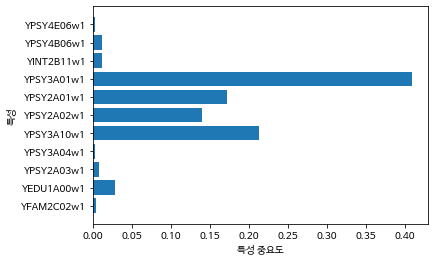

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_mynpl(gbrt)

* 랜덤 포레스트의 특성 중요도와 비교시, 주요 4개 특성은 랜덤 포레스트와 비슷한 특성을 강조하고 있지만, 나머지 특성은 무시됨

## 배깅

### 배깅을 사용하여 로지스틱 회귀 모델을 100개 훈련하여 앙상불

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(), n_estimators=100, 
                            oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=True,
                  random_state=42, ver

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(bagging.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(X_test, y_test)))
print("OOB 샘플의 정확도: {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도: 0.885
테스트 세트 정확도: 0.892
OOB 샘플의 정확도: 0.881


* 훈련할 분류기 개수를 100개로 지정
* 부트스트래핑에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가(oob_score = True)

### 의사결정나무에 배깅을 적용

In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, 
                            oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [ ]:
print("훈련 세트 정확도: {:.3f}".format(bagging.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(X_test, y_test)))
print("OOB 샘플의 정확도: {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도: 0.982
테스트 세트 정확도: 0.858
OOB 샘플의 정확도: 0.863


* n_estimators 를 100으로 지정하여 배깅을 사용한 결과 로지스틱 회귀 모델에 배깅을 사용한 결과보다 정확도가 떨어짐

## ExtraTrees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)
xtree.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(xtree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(xtree.score(X_test, y_test)))

훈련 세트 정확도: 0.982
테스트 세트 정확도: 0.863


* 랜덤 포레스트와 비슷한 정확도를 냄
* 엑스트라 트리가 랜덤 포레스트보다 계산 비용이 적지만 부작위 분할 때문에 일반화 성능을 높이려면 많은 트리를 만들어야 함.

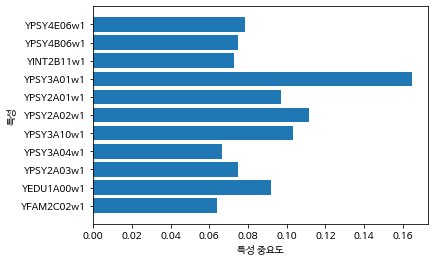

In [ ]:
n_features = X.shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), feature_cols)
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)
plt.show()

* 랜덤포레스트 결과와 비슷함

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=42)

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(ada.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(ada.score(X_test, y_test)))

훈련 세트 정확도: 0.881
테스트 세트 정확도: 0.886


* 일반화 성능이 더 향상 됨
* 테스트 세트 정확도 높아짐

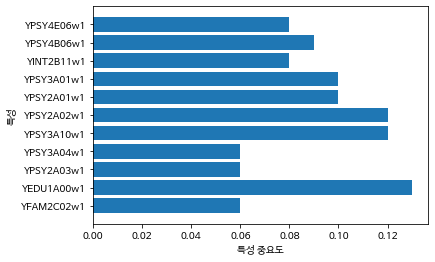

In [ ]:
plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), feature_cols)
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)
plt.show()

* 다른 모델에서 중요도가 낮았던 YEDU1A00w1 이 가장 높음

## 서포트 벡터 머신(SVM)

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.89


* 테스트 정확도가 높게 확인 됨

## 신경망

### MLPClassifier 적용

In [ ]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(
    X,Y, random_state=0)

mlp = MLPClassifier(random_state=42,max_iter=1000)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.89
테스트 세트 정확도: 0.88


### 입력 특성을 평균 0, 분산 1로 변형

In [ ]:
# 훈련 세트 각 특성의 평균 계산
mean_on_train = X_train.mean(axis=0)
# 표준 편차 계산
std_on_train = X_train.std(axis=0)

# 평균 0, 표준 편차 1 인 데이터로 변환
X_train_scaled = (X_train - mean_on_train) / std_on_train
# 테스트 세트 적용 
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0, max_iter=2000)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.974
테스트 세트 정확도: 0.866


* 데이터의 스케일링 후 일반화 성능이 높아짐

### 반복 횟수를 1500으로 늘림

In [ ]:
mlp = MLPClassifier(max_iter=1500, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.974
테스트 세트 정확도: 0.866


### 가중치를 더 강하게 규제하도록 alpha 매개변수를 1로 크게 증가시킴

In [ ]:
mlp = MLPClassifier(max_iter=1500, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.892
테스트 세트 정확도: 0.894


* 모델 성능이 더 높아짐

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


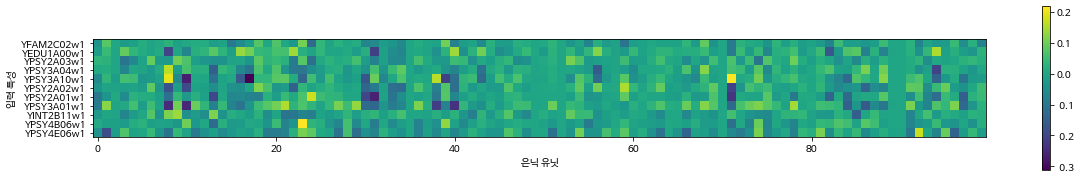

In [ ]:
plt.figure(figsize=(20, 3))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(11), feature_cols)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()